<a href="https://colab.research.google.com/github/Fiarma5233/Data-Science/blob/master/Long_Term_Investor_Detection_with_ML_Engage_with_the_Investment_Community's_Stalwarts_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<hr> </hr>

**1. Project title : Long-term Investor Prediction with Machine Learning**


While banks are interested in maintaining their customers,  their are also interested in getting new customers. In addition, the bank can only really  improve their profit margins by encouraging their customers to make long-term deposits and investistment with them.  One strategy to do this would be to advertise  to the customers by telemarketing calls.

This project will aim to employ machine learning  for the task of predicting the efficacity  of telemarketing compaigns run by banking institutions .


<hr> </hr>


**2. Methodology**





This project will be carried out using CRISP-DM(CRoss Industry Standard Process for Data Mining) methodology. This is one of the more populate data science methodologies and is characterized by six importantes phases, which are as follows:


1.   Bussiness Understanding

2.   Data Understanding


3.   Data Preparation

4.   Data Modelling


5.   Model Evaluation, and

6.   Model Deployment



<hr> </hr>


**3. Tools **

The tools of use in this project include :


1.   Pandas

2.   Numpy

3.   Matplotlib & Seaborn

4.   Sci-kit learn



3.1.   Pandas & Numpy

Pandas is a Python library built upon the Numpy library . The idea behind Pandas is  to be able operate on text data, where Numpy is best suited for numerical operations, inspective of the fact that it can represent text to some degree


3.2.  **Matplotlib & Seaborn**

**Matplotlib** and **Seaborn** are Python libraries for data visualization. Other alternatives include **Bokech** and **Plotly**


3.3.  **Sci-kit learn**

**Sci-kit learn** is a Python library for Machine Learning and data modeling . It provides a lot of utilities and algorithmic implementations for a variety of ML tasks such as classification, regression, outlier detection, and clustering







<hr> </hr>


<hr> </hr>

<h1> Project Implementation via CRISP-DM</h1>

<hr> </hr>

**<h3>01.   Business Understanding</h3>**

**EliteBank Investment Services** is a leading financial institution specializing in investment banking, asset manangment, and wealth advisory services. To improve their profiability,  they intent to run  a new telemarketing compaign  to bring in fresh investments. To this end, they would like to leverage the data  obtained from previous compaigns to forecast how likely they are to convince customers to invest.

This would be an immense boon to them in the following  ways:



1.   Provide a likelihood  estimation as to the chances customer buying long-term deposits


2.   Provide good plan as to the customers to focus more attention on .

3.    Provide  some information as to the efficacy  of telemarketing compaign






<hr> </hr>

**<h3>02.   Data Understanding*</h3>**



With the **Business Understanding** out of the way, the next step is to understand the data  to be obtained and used for the task. This will involve the pocess of **Exploratory Data Analysis(EDA)**

EDA is a process of sifting through data with the goal of extracting insights. These insights allow a better understanding of the available data and what  can be done with it.
They can also be used for guided preparation of the dataset in the appropriate manner. Just like regular analysis,EDA begins with aet of **questions** and/or **hypotheses**. The EDA process will then prove or disprove these hypotheses, and hopefully, reveal other points of inquiry along the way.

The required libraries and packages are imported first. EDA process is carried out here as shown below. The high-level steps to follow are :    



1.   Import the required libraries
2.   Load in the dataset
3.   Analyze and observe its properties


        *   Missing data
        *   Inconsistent values
        *   Low cartegorical cardinality
        *   Feature correlations

4.   Report on these properties and how they might affect our final solution




<hr> </hr>





In [ ]:
# Import required utilities
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set() # set visualization

In [ ]:
# SEEDD for reproductiity

SEED = np.random.seed(2024)

In [ ]:
https://drive.google.com/file/d/1ZEbg_yf9i0CVyYqduKgjm1lZdYquzJ8J/view?usp=sharing

In [ ]:
# notre dataset est au format .arff donc ne peut pas etre directement lu par pandas
# donc il faut trouver les moyens de faire lire notre dataset

## Importation de la fonction pour lire et écrire des fichiers ARFF (Attribute-Relation File Format)
from scipy.io import arff

# installation de gdown pour telecharger notre dataset
!pip install gdown

import gdown
file_id = '1ZEbg_yf9i0CVyYqduKgjm1lZdYquzJ8J' # l' id de notre dataset se trouve dans google drive
output_file = "Bank_Marketing_Data.arff" # nom du fichier en sortie

gdown.download(id = file_id, output=output_file, quiet=False) # telechargement du dataset

Downloading...
From: https://drive.google.com/uc?id=1ZEbg_yf9i0CVyYqduKgjm1lZdYquzJ8J
To: /content/Bank_Marketing_Data.arff
100%|██████████| 920k/920k [00:00<00:00, 98.1MB/s]


'Bank_Marketing_Data.arff'

In [ ]:
'''def truncate_data(data):
  if data.isdigit():
    return int(data)
  else:
    if "." in data:
      try:
        return float(data)
      except:
        return data

  return data


def truncate_row(row):
  return [
      truncate_data(data) for data in row
  ]
'''

'def truncate_data(data):\n  if data.isdigit():\n    return int(data)\n  else:\n    if "." in data:\n      try:\n        return float(data)\n      except:\n        return data\n  \n  return data\n\n\ndef truncate_row(row):\n  return [\n      truncate_data(data) for data in row\n  ]\n'

In [ ]:
# Fonction pour tronquer les données
def truncate_data(data):
    # Vérifie si les données sont un chiffre
    if data.isdigit():
        return int(data)  # Convertit en entier si c'est un chiffre
    else:
        # Vérifie si les données contiennent un point (pour les nombres à virgule flottante)
        if "." in data:
            try:
                return float(data)  # Convertit en flottant si possible
            except:
                return data  # Retourne les données originales si la conversion échoue
    return data  # Retourne les données originales si ce n'est ni un chiffre ni un flottant

# Fonction pour tronquer chaque élément d'une ligne
def truncate_row(row):
    return [
        truncate_data(data) for data in row  # Applique truncate_data à chaque élément de la ligne
    ]


In [ ]:
'''def read_data(data_path):

  with open(data_path, 'r') as f:
    lines = f.readlines()

  # get columns names
  columns = [
      line.split(" ")[1] for line in lines if line.startswith("@ATTRIBUTE")
  ]

  ix = 0
  for (i, line) in enumerate(lines):
    if line.startswith("@DATA"):
      ix = i
      break

  lines = lines[ix + 1:] # Pick out data lines

  data = [
      truncate_row(row.replace("\n", "").strip().split(",")) for row in lines
  ]

  data = [row for row in data if len(row) == len(columns)]

  return pd.DataFrame(data, columns=columns) '''

'def read_data(data_path):\n\n  with open(data_path, \'r\') as f:\n    lines = f.readlines()\n\n  # get columns names\n  columns = [\n      line.split(" ")[1] for line in lines if line.startswith("@ATTRIBUTE")\n  ]\n\n  ix = 0\n  for (i, line) in enumerate(lines):\n    if line.startswith("@DATA"):\n      ix = i \n      break\n\n  lines = lines[ix + 1:] # Pick out data lines\n\n  data = [\n      truncate_row(row.replace("\n", "").strip().split(",")) for row in lines\n  ]\n\n  data = [row for row in data if len(row) == len(columns)]\n\n  return pd.DataFrame(data, columns=columns) '

In [ ]:
def read_data(data_path):
    # Ouverture du fichier en lecture
    with open(data_path, 'r') as f:
        lines = f.readlines()  # Lecture de toutes les lignes du fichier

    # Extraction des noms de colonnes à partir des lignes commençant par "@ATTRIBUTE"
    columns = [
        line.split(" ")[1] for line in lines if line.startswith("@ATTRIBUTE")
    ]

    # Recherche de la ligne commençant par "@DATA" pour déterminer où commencent les données
    ix = 0
    for (i, line) in enumerate(lines):
        if line.startswith("@DATA"):
            ix = i
            break

    lines = lines[ix + 1:]  # Extraction des lignes de données en excluant l'en-tête "@DATA"

    # Troncation et transformation des lignes de données en listes, en retirant les caractères "\n" et en séparant par ","
    data = [
        truncate_row(row.replace("\n", "").strip().split(",")) for row in lines
    ]

    # Filtrage des lignes où la longueur correspond au nombre de colonnes extraites
    data = [row for row in data if len(row) == len(columns)]

    # Création d'un DataFrame Pandas avec les données et les colonnes
    return pd.DataFrame(data, columns=columns)


In [ ]:
# Read data
data = read_data(output_file)

In [ ]:
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  object
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  object
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(5), object(12)
memory usage: 1.4+ MB


In [ ]:
# convert features  to correct datatypes
for column in data.select_dtypes(include=['object']).columns:
    try:
      data[column] = data[column].values.astype("int")
    except:
      pass

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


In [ ]:
# Feature cardinality
data.nunique()

age            76
job            12
marital         3
education       4
default         2
balance      3805
housing         2
loan            2
contact         3
day            31
month          12
duration     1428
campaign       36
pdays         472
previous       34
poutcome        4
deposit         2
dtype: int64

In [ ]:
# Describe data
data.describe(include='all')

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
count,11162.000000,11162,11162,11162,11162,11162.000000,11162,11162,11162,11162.000000,11162,11162.000000,11162.000000,11162.000000,11162.000000,11162,11162
unique,NaN,12,3,4,2,NaN,2,2,3,NaN,12,NaN,NaN,NaN,NaN,4,2
top,NaN,management,married,secondary,no,NaN,no,no,cellular,NaN,may,NaN,NaN,NaN,NaN,unknown,no
freq,NaN,2566,6351,5476,10994,NaN,5881,9702,8042,NaN,2824,NaN,NaN,NaN,NaN,8326,5873
mean,41.231948,NaN,NaN,NaN,NaN,1528.538524,NaN,NaN,NaN,15.658036,NaN,371.993818,2.508421,51.330407,0.832557,NaN,NaN
std,11.913369,NaN,NaN,NaN,NaN,3225.413326,NaN,NaN,NaN,8.420740,NaN,347.128386,2.722077,108.758282,2.292007,NaN,NaN
min,18.000000,NaN,NaN,NaN,NaN,-6847.000000,NaN,NaN,NaN,1.000000,NaN,2.000000,1.000000,-1.000000,0.000000,NaN,NaN
25%,32.000000,NaN,NaN,NaN,NaN,122.000000,NaN,NaN,NaN,8.000000,NaN,138.000000,1.000000,-1.000000,0.000000,NaN,NaN
50%,39.000000,NaN,NaN,NaN,NaN,550.000000,NaN,NaN,NaN,15.000000,NaN,255.000000,2.000000,-1.000000,0.000000,NaN,NaN
75%,49.000000,NaN,NaN,NaN,NaN,1708.000000,NaN,NaN,NaN,22.000000,NaN,496.000000,3.000000,20.750000,1.000000,NaN,NaN


In [ ]:
# check for missing values

100 * data.isnull().sum() / len(data)

age          0.0
job          0.0
marital      0.0
education    0.0
default      0.0
balance      0.0
housing      0.0
loan         0.0
contact      0.0
day          0.0
month        0.0
duration     0.0
campaign     0.0
pdays        0.0
previous     0.0
poutcome     0.0
deposit      0.0
dtype: float64

In [ ]:
# Get the duplicated records
num_duplicate = len(data.loc[data.duplicated()])
num_duplicate

0

###Customers occupation and age

<ipython-input-31-0fa1faa57668>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['age'])


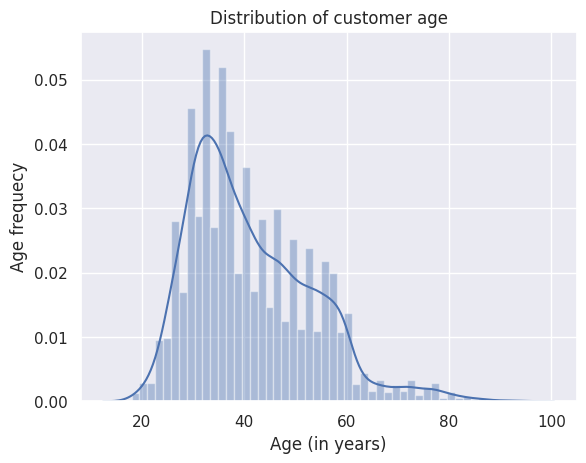

In [ ]:
# Distribution of customer age

sns.distplot(data['age'])

plt.title('Distribution of customer age')
plt.xlabel('Age (in years)')
plt.ylabel('Age frequecy')
plt.show();
plt.close("all")

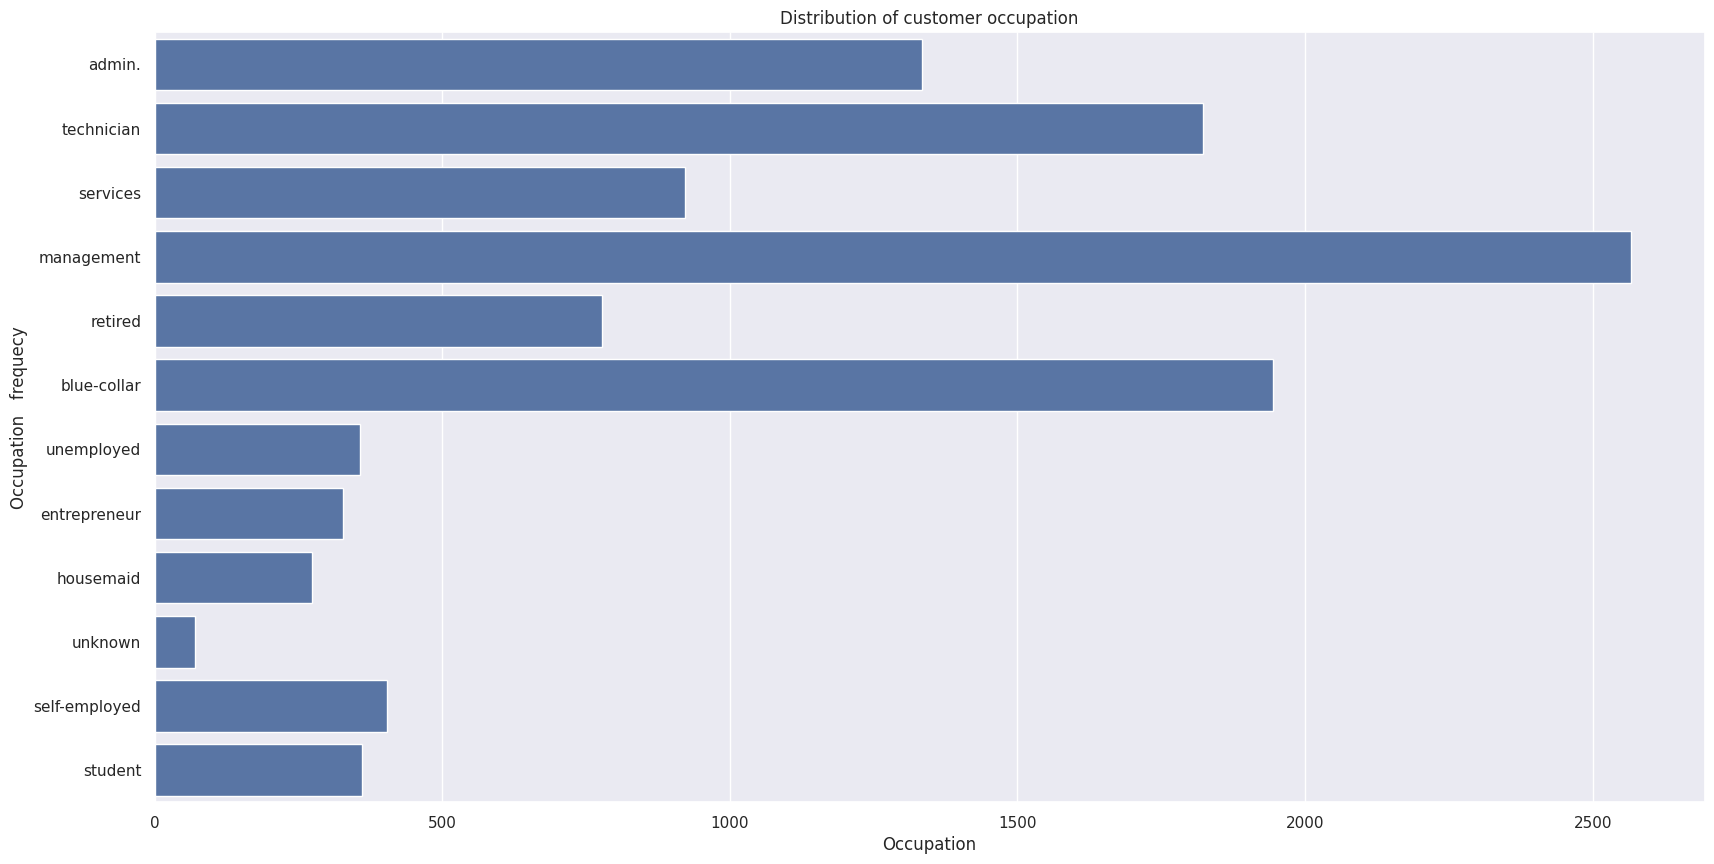

In [ ]:
# Distribution of customer occupation

plt.figure(figsize=(20, 10))

sns.countplot(data['job'])

plt.title('Distribution of customer occupation')
plt.xlabel('Occupation')
plt.ylabel('Occupation   frequecy')
plt.show();
plt.close("all")

In [ ]:
# categorize ages

hue = data['age'].apply(lambda x: "Working age" if x < 60 else "Retirement age ")

age_job = data[['job']].copy()
age_job['hue'] = hue.values

In [ ]:
age_job.head()

,job,hue
0,admin.,Working age
1,admin.,Working age
2,technician,Working age
3,services,Working age
4,admin.,Working age


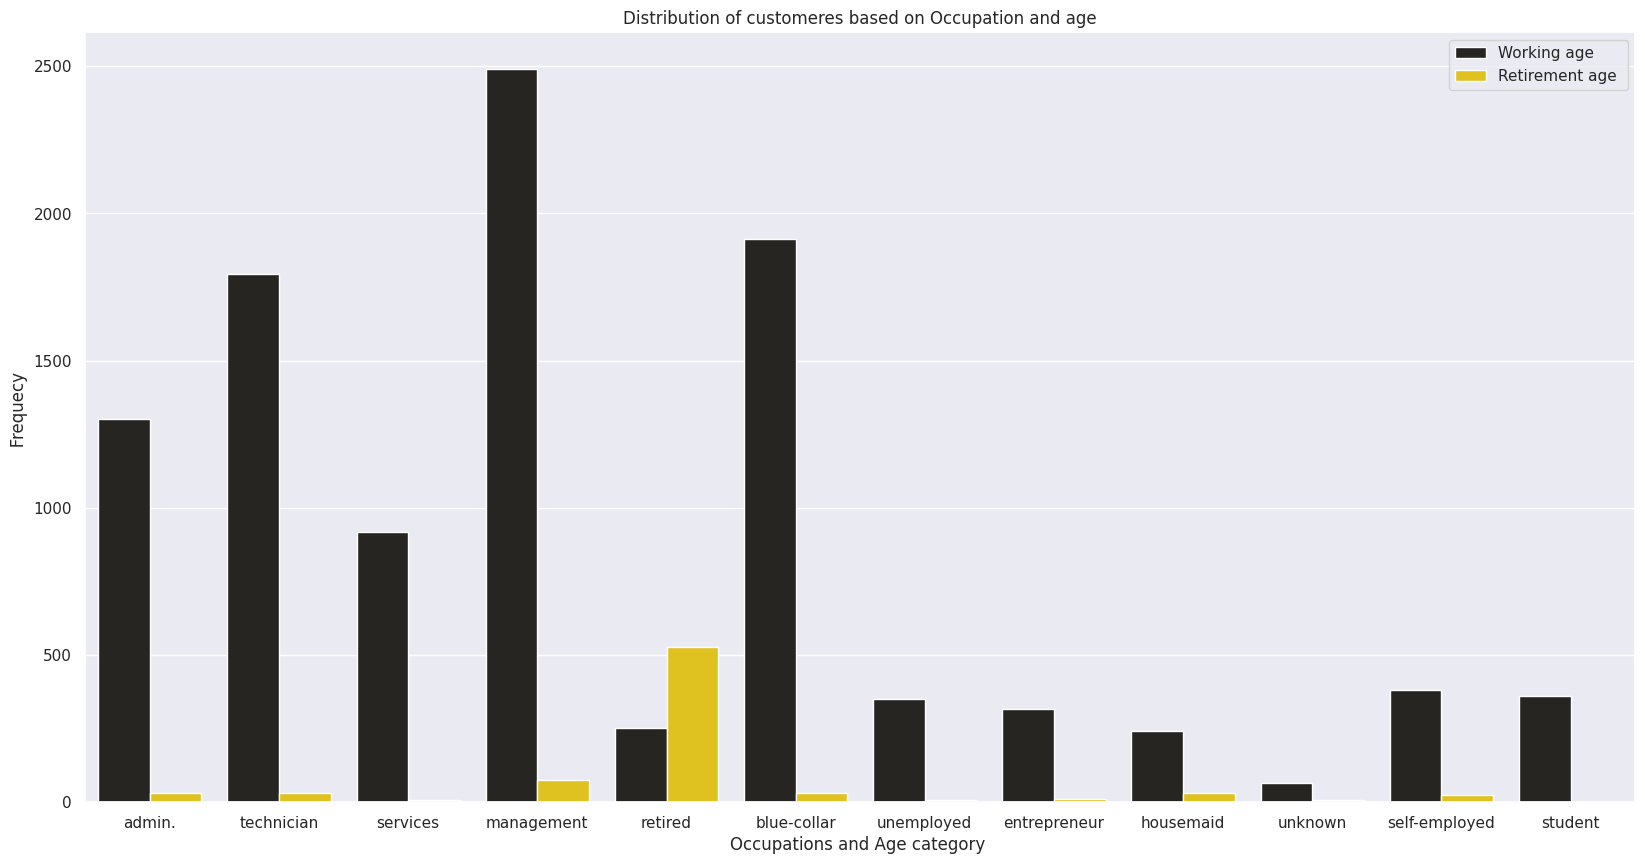

In [ ]:
# occupation and  age

plt.figure(figsize=(20, 10))

sns.countplot(x='job', hue='hue', data=age_job, palette= "dark:gold")

plt.title('Distribution of customeres based on Occupation and age')
plt.xlabel('Occupations and Age category ')
plt.ylabel('   Frequecy')
plt.legend()
plt.show();
plt.close("all")

###Debt Analysis

1. Comparison between types of debt

2. Comparison between types of debt and :    

    .   Material status

    .   Deposit decision

In [ ]:
data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'deposit'],
      dtype='object')

##Personal loans (loan) and credit status (default)

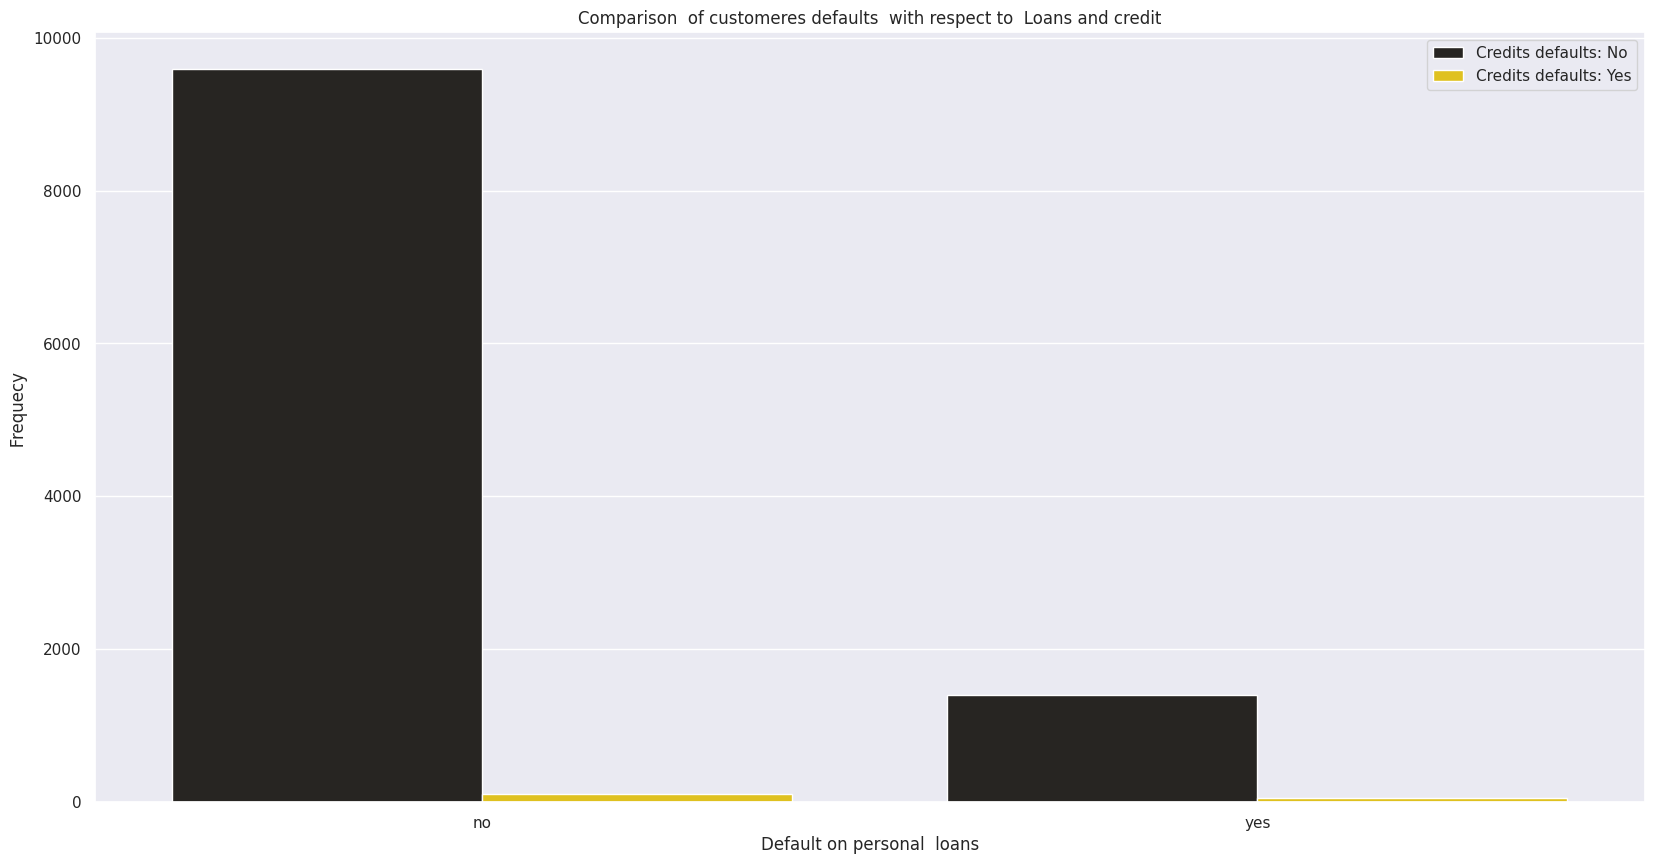

In [ ]:
plt.figure(figsize=(20, 10))

sns.countplot(x='loan', hue='default', data=data, palette= "dark:gold")

plt.title('Comparison  of customeres defaults  with respect to  Loans and credit')
plt.xlabel('Default on personal  loans')
plt.ylabel('   Frequecy')
plt.legend(["Credits defaults: No", "Credits defaults: Yes"])
plt.show();
plt.close("all")

##Housing loans (housing) and credit status (default)

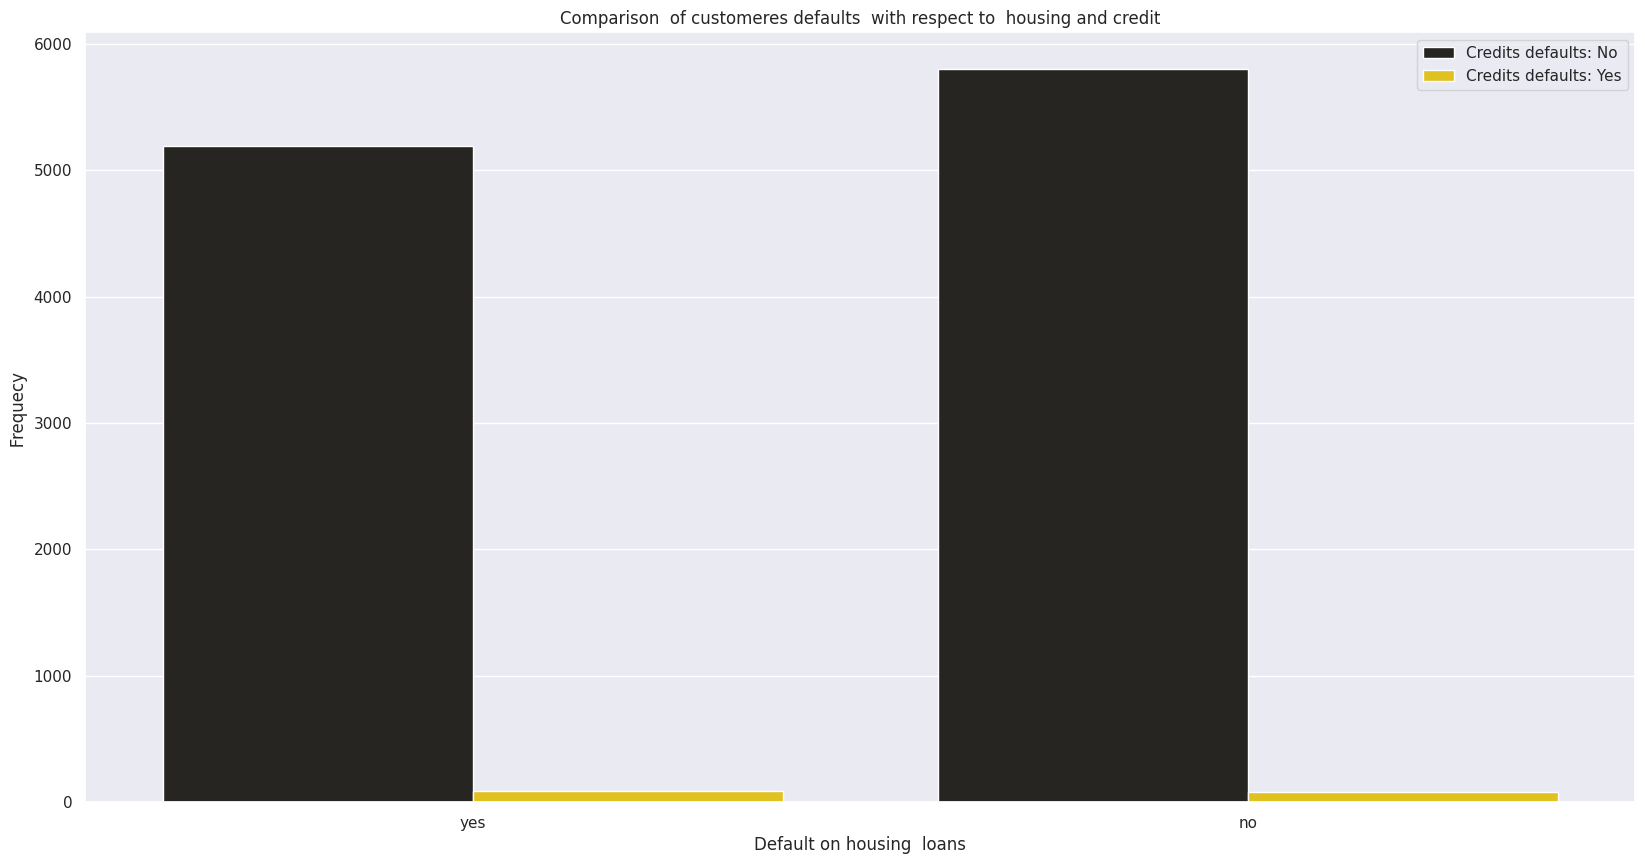

In [ ]:
plt.figure(figsize=(20, 10))

sns.countplot(x='housing', hue='default', data=data, palette= "dark:gold")

plt.title('Comparison  of customeres defaults  with respect to  housing and credit')
plt.xlabel('Default on housing  loans')
plt.ylabel('   Frequecy')
plt.legend(["Credits defaults: No", "Credits defaults: Yes"])
plt.show();
plt.close("all")

##Personal loans (loan) and housing loans status (housing)

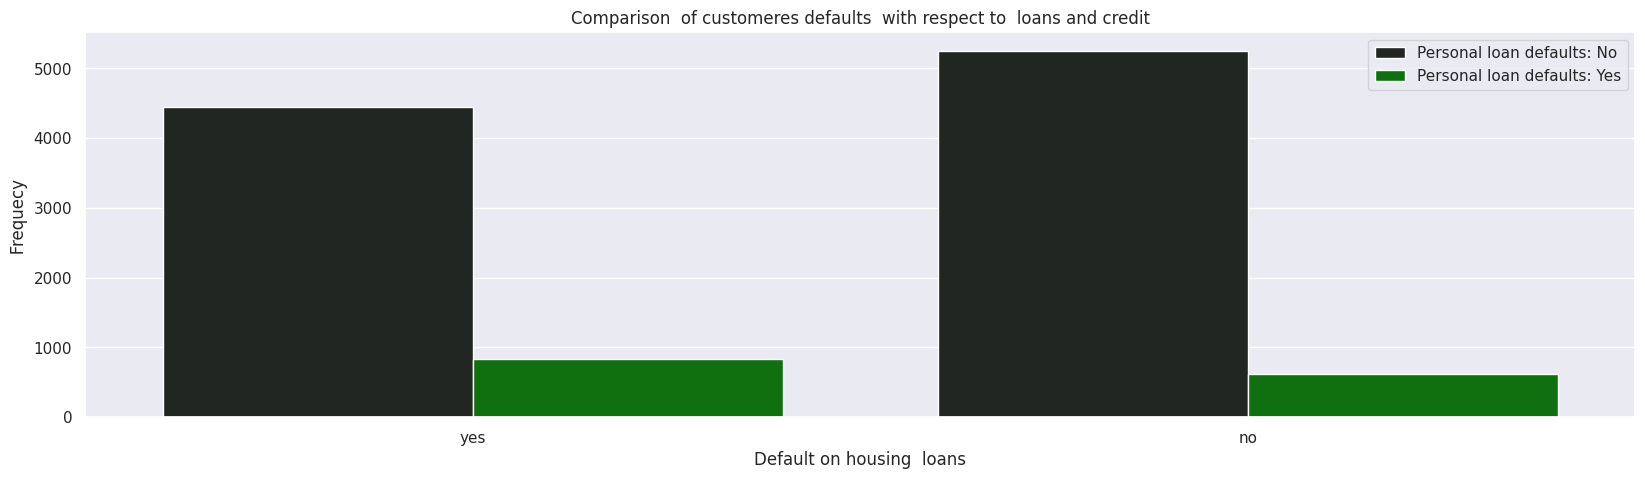

In [125]:
plt.figure(figsize=(20, 5))

sns.countplot(x='housing', hue='loan', data=data, palette= "dark:green")

plt.title('Comparison  of customeres defaults  with respect to  loans and credit')
plt.xlabel('Default on housing  loans')
plt.ylabel('   Frequecy')
plt.legend(["Personal loan defaults: No", "Personal loan defaults: Yes"])
plt.show();
plt.close("all")

##Comparison between types and of debt and material status

Comparrision between marital (marital) status and credit  defauts (default)

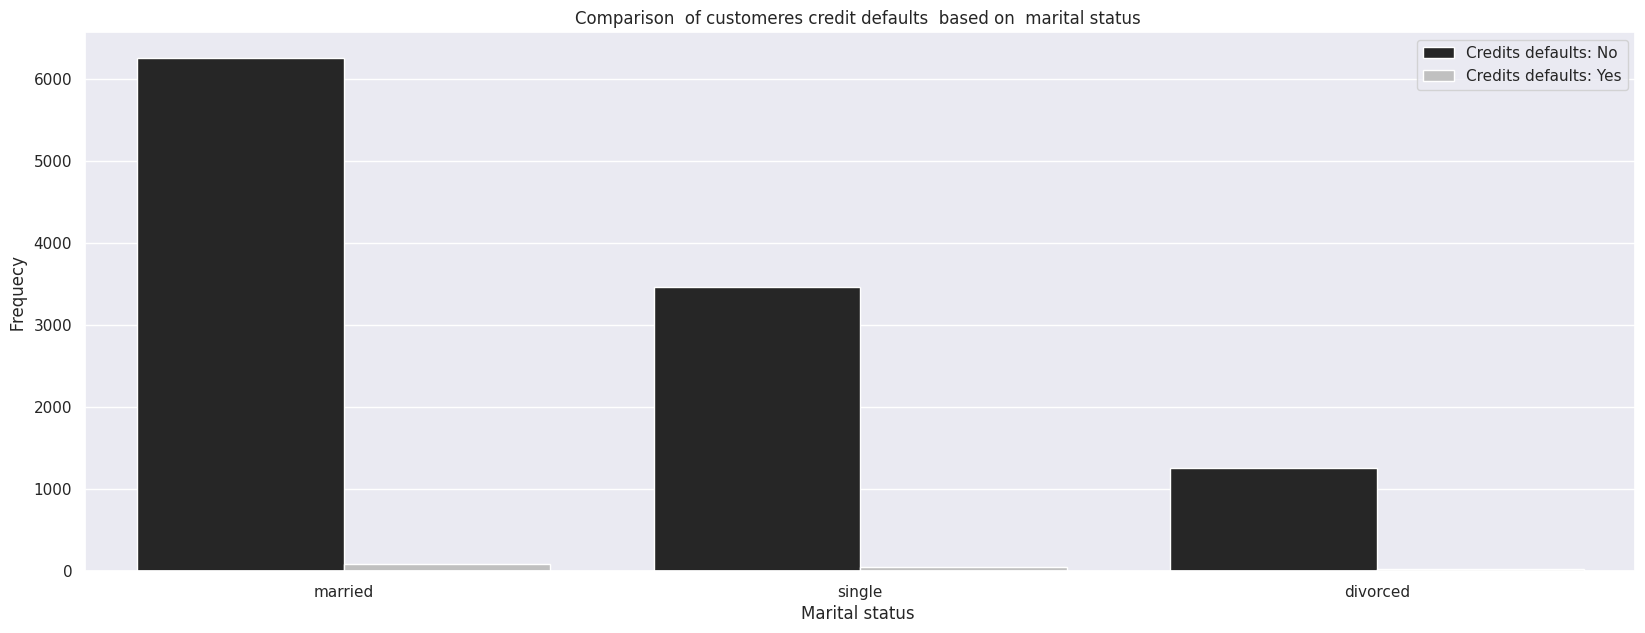

In [126]:
# Material status and credit default

plt.figure(figsize=(20, 7))

sns.countplot(x='marital', hue='default', data=data, palette= "dark:silver")

plt.title('Comparison  of customeres credit defaults  based on  marital status ')
plt.xlabel('Marital status ')
plt.ylabel('   Frequecy')
plt.legend(["Credits defaults: No", "Credits defaults: Yes"])

Comparrision between marital (marital) status and loans  defauts (loan)

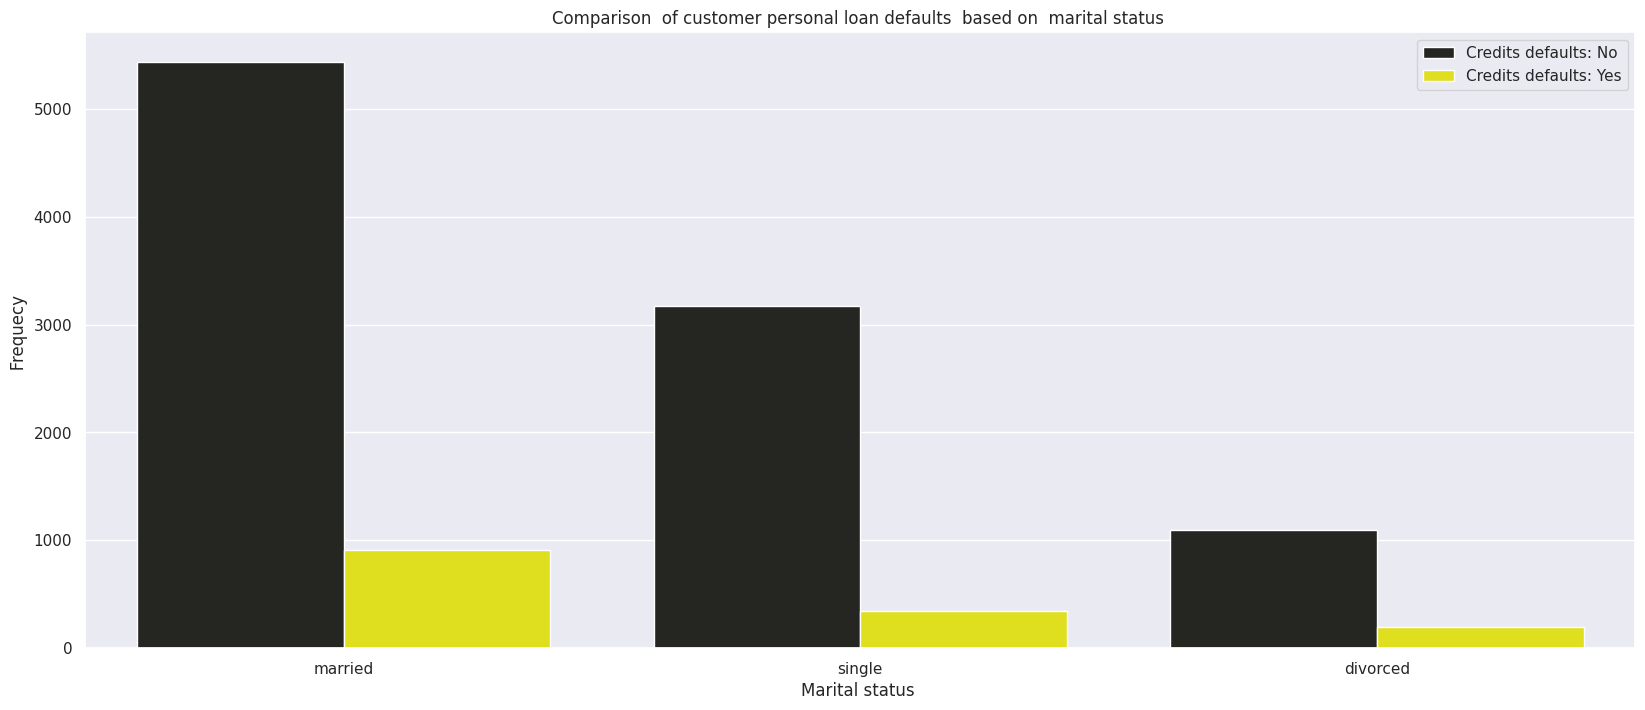

In [127]:
# Material status and personal loan  default

plt.figure(figsize=(20, 8))

sns.countplot(x='marital', hue='loan', data=data, palette= "dark:yellow")

plt.title('Comparison  of customer personal loan defaults  based on  marital status ')
plt.xlabel('Marital status ')
plt.ylabel('   Frequecy')
plt.legend(["Credits defaults: No", "Credits defaults: Yes"])

## Comparison between marital (marital) status and housing loans defaults (housing)

Text(0, 0.5, '   Frequecy')

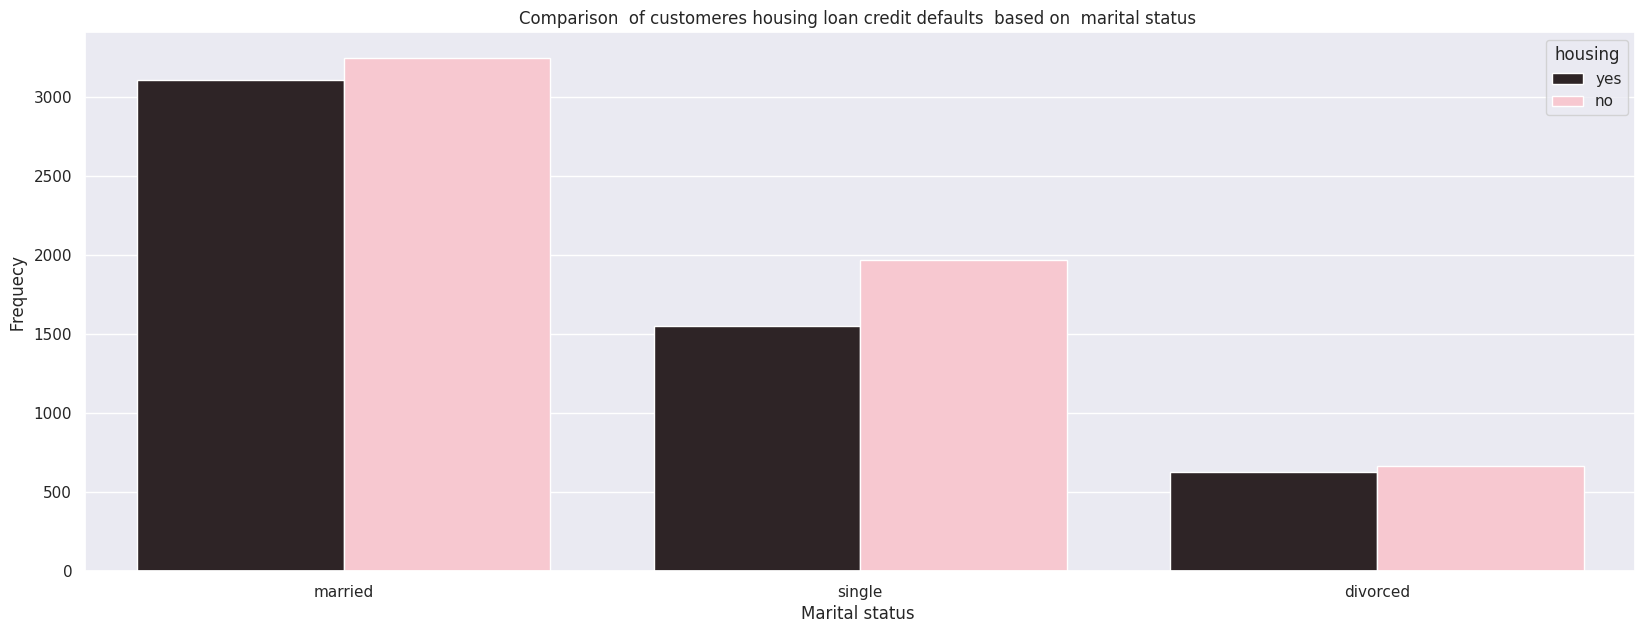

In [128]:
# Material status and housing default

plt.figure(figsize=(20, 7))

sns.countplot(x='marital', hue='housing', data=data, palette= "dark:pink")

plt.title('Comparison  of customeres housing loan credit defaults  based on  marital status ')
plt.xlabel('Marital status ')
plt.ylabel('   Frequecy')
#plt.legend(["Credits defaults: No", "Credits defaults: Yes"])

In [ ]:
data['marital'].value_counts(normalize=True)

marital
married     0.568984
single      0.315176
divorced    0.115839
Name: proportion, dtype: float64

##Comparision between types and debt deposit decision

Text(0, 0.5, '   Frequecy')

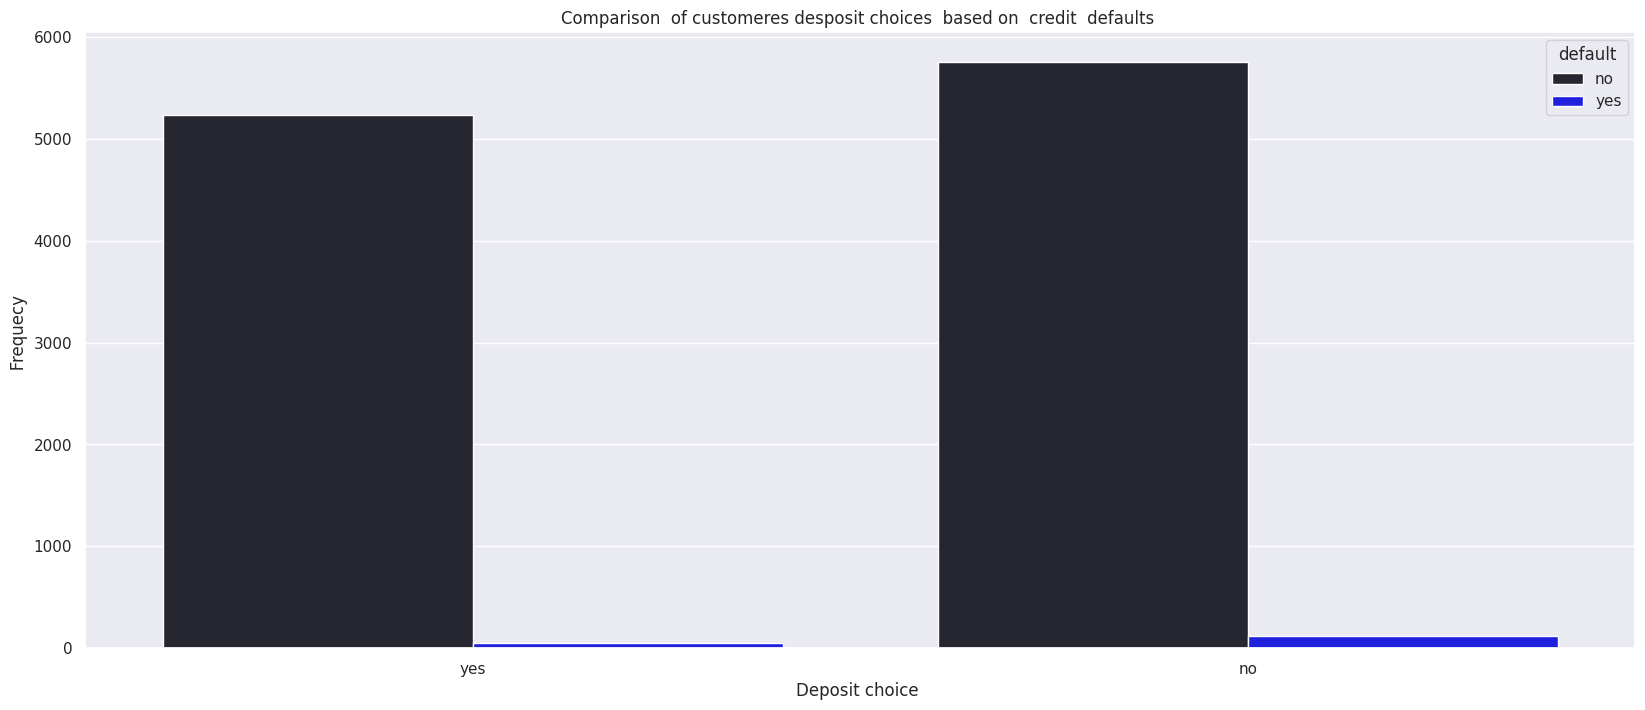

In [129]:
#Deposite  choices  and credit defaults

plt.figure(figsize=(20, 8))

sns.countplot(x='deposit', hue='default', data=data, palette= "dark:blue")

plt.title('Comparison  of customeres desposit choices  based on  credit  defaults ')
plt.xlabel('Deposit choice ')
plt.ylabel('   Frequecy')
#plt.legend(["Credits defaults: No", "Credits defaults: Yes"])

##Comparision between personal loans and  deposit decision

Text(0, 0.5, '   Frequecy')

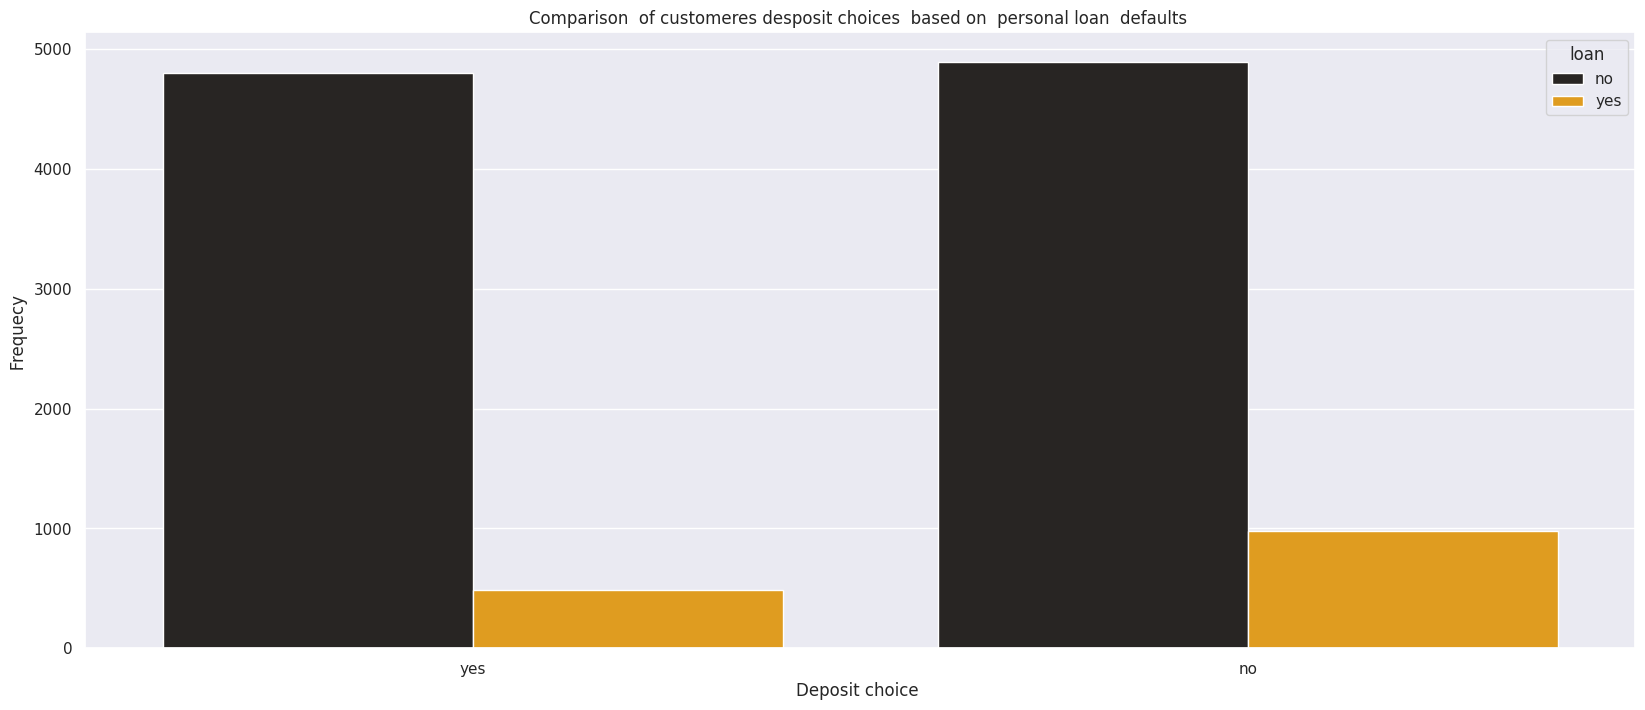

In [130]:
#Deposite  choices  and personal loan defaults

plt.figure(figsize=(20, 8))

sns.countplot(x='deposit', hue='loan', data=data, palette= "dark:orange")

plt.title('Comparison  of customeres desposit choices  based on  personal loan  defaults ')
plt.xlabel('Deposit choice ')
plt.ylabel('   Frequecy')
#plt.legend(["Credits defaults: No", "Credits defaults: Yes"])

##Comparision between housing loans and deposit decision

Text(0, 0.5, '   Frequecy')

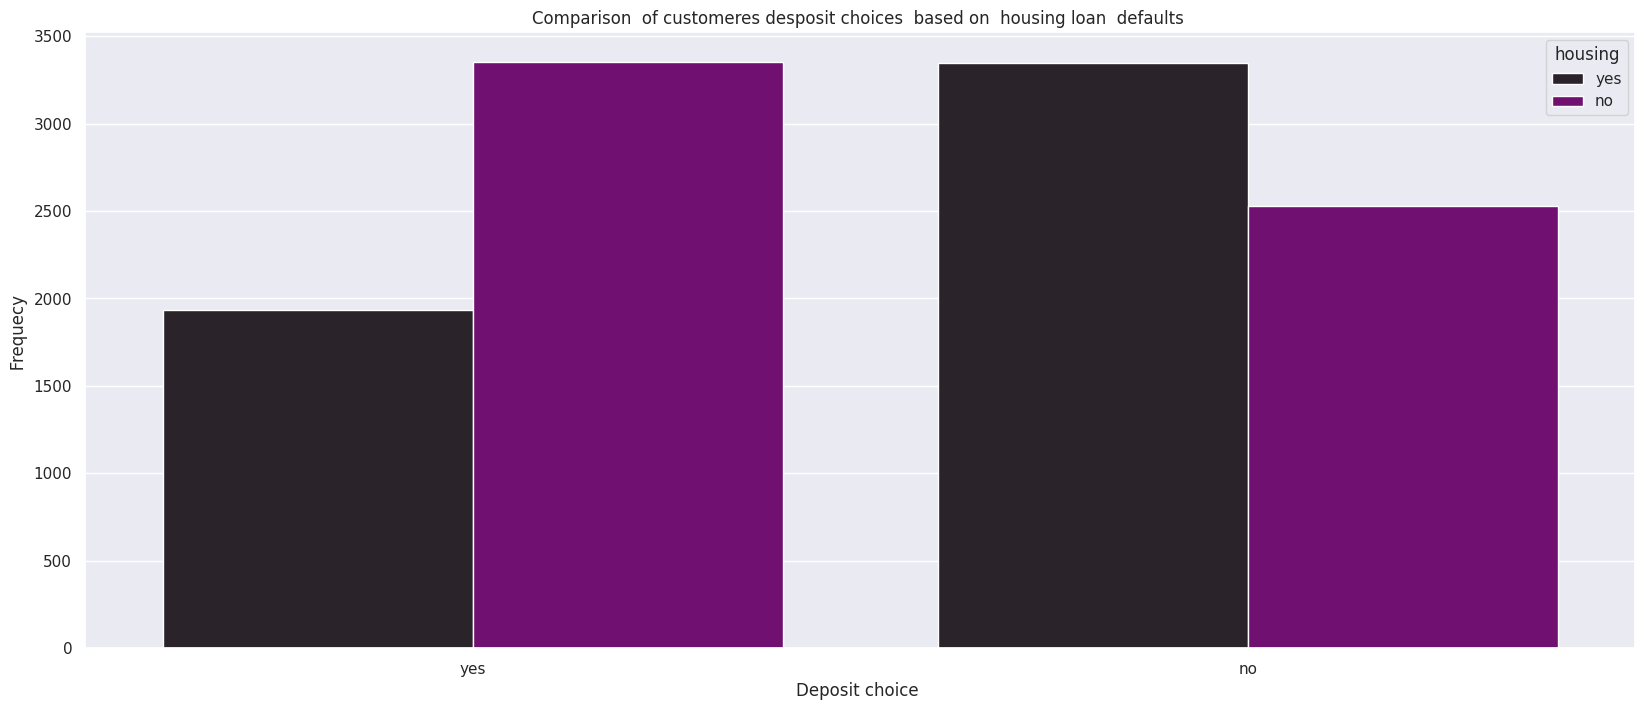

In [131]:
#Deposit  choice  and housing  loan defaults

plt.figure(figsize=(20, 8))

sns.countplot(x='deposit', hue='housing', data=data, palette= "dark:purple")

plt.title('Comparison  of customeres desposit choices  based on  housing loan  defaults ')
plt.xlabel('Deposit choice ')
plt.ylabel('   Frequecy')
#plt.legend(["Credits defaults: No", "Credits defaults: Yes"])

##Customer occupation with respect to their educational level

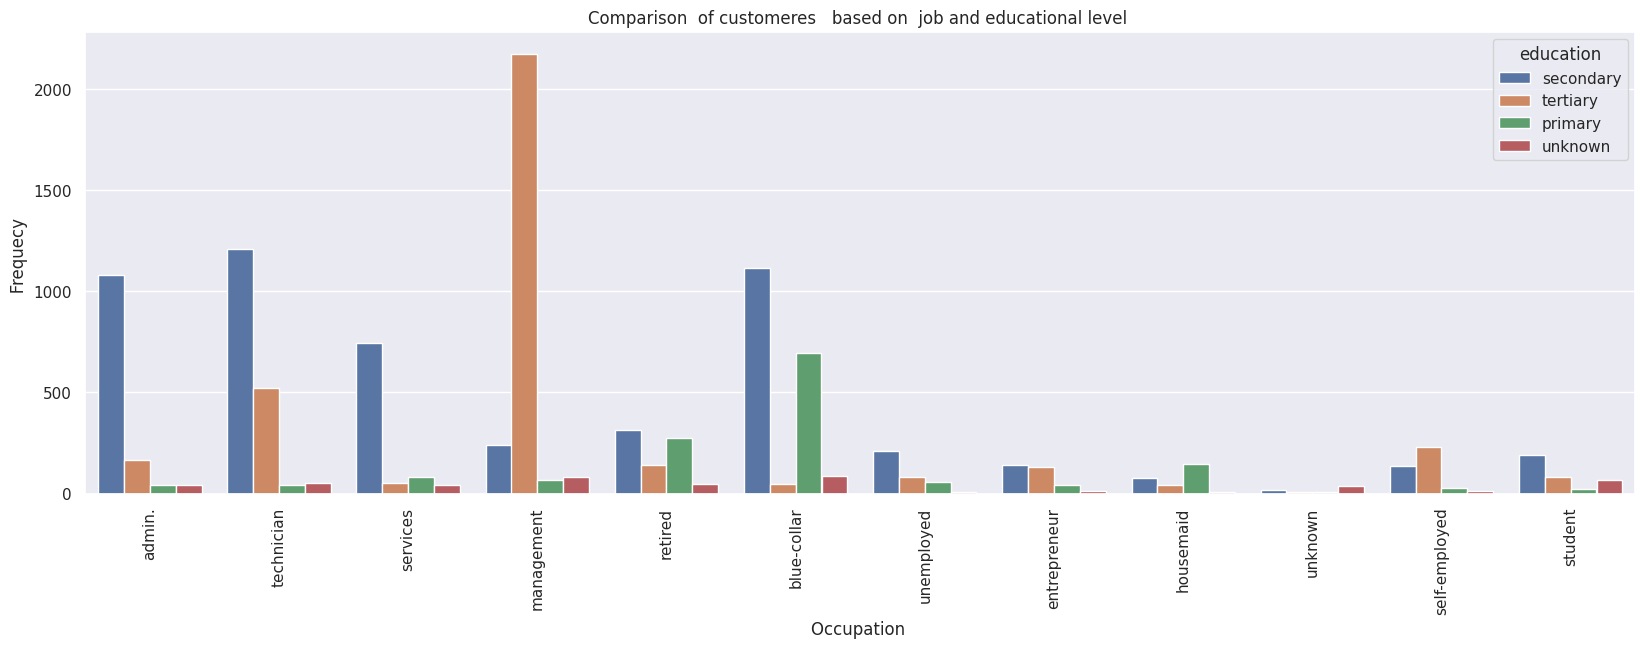

In [133]:
# occupatio wrt education

plt.figure(figsize=(20, 6))

sns.countplot(x='job', hue='education', data=data)

plt.title('Comparison  of customeres   based on  job and educational level ')
plt.xlabel('Occupation ')
plt.ylabel('   Frequecy')
plt.xticks(rotation=90)
plt.show();
plt.close("all")

###Customer occupation with respect to their choices

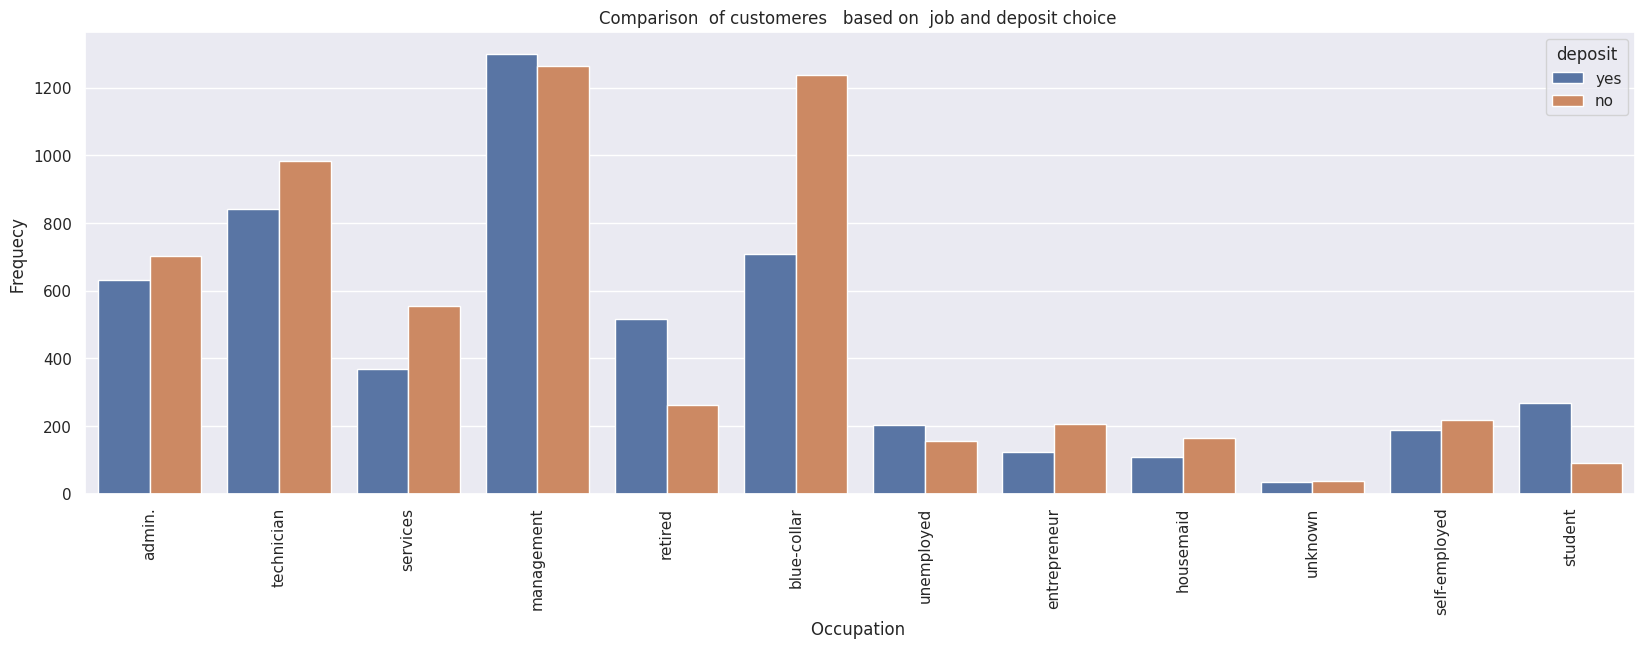

In [134]:
# occupatio wrt deposit choices

plt.figure(figsize=(20, 6))

sns.countplot(x='job', hue='deposit', data=data)

plt.title('Comparison  of customeres   based on  job and deposit choice ')
plt.xlabel('Occupation ')
plt.ylabel('   Frequecy')
plt.xticks(rotation=90)
plt.show();
plt.close("all")

### Comparison between customer decision in previous compaigns vs present compaign

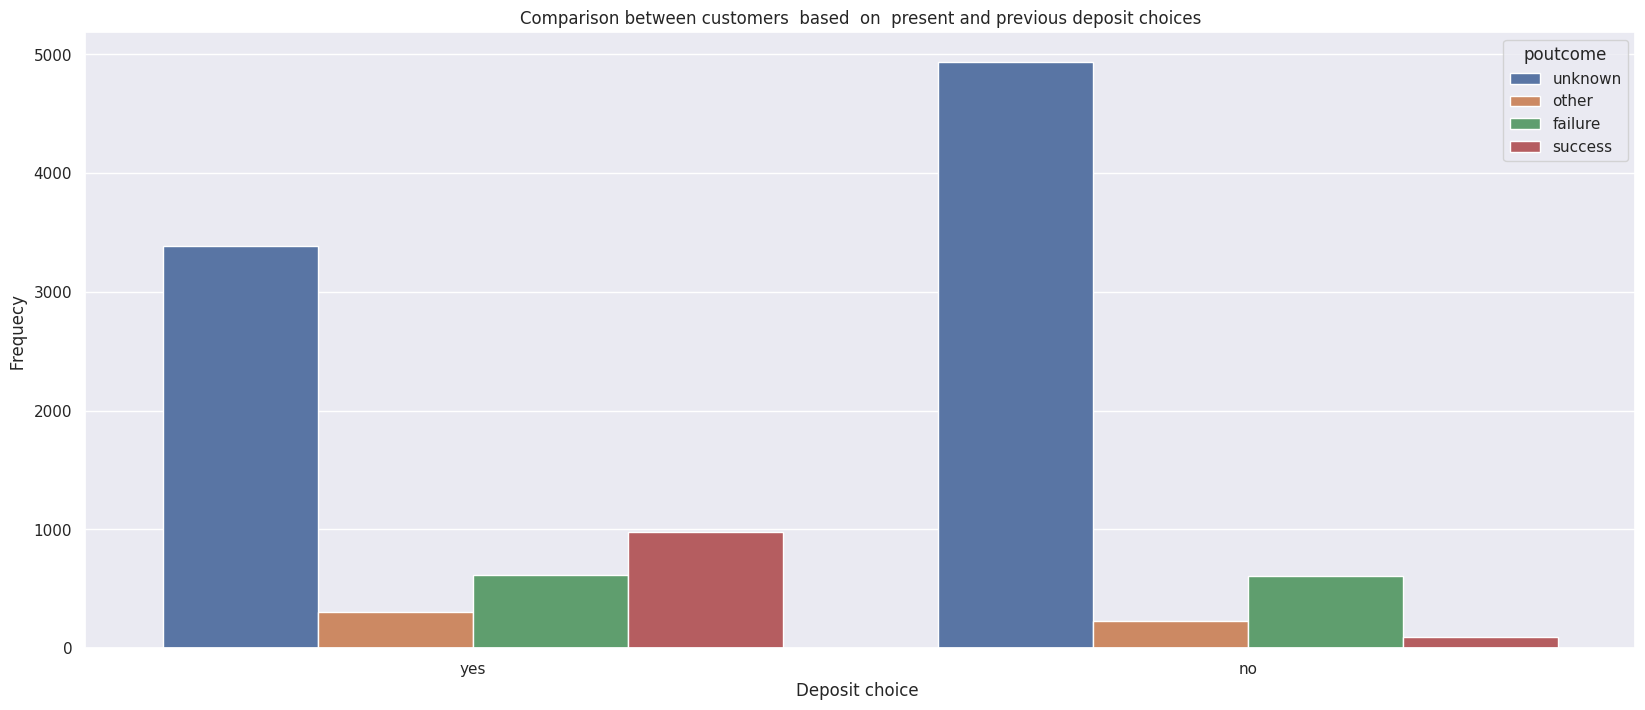

In [135]:
# Deposit cjhoice by previous outcome

plt.figure(figsize=(20, 8))

sns.countplot(x='deposit', hue='poutcome', data=data)

plt.title("Comparison between customers  based  on  present and previous deposit choices")
plt.xlabel('Deposit choice ')
plt.ylabel('   Frequecy')
plt.show();
plt.close("all")

In [ ]:
data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'deposit'],
      dtype='object')

##Customer deposit decision based on inter-campaign telemarketing call  interval

In [ ]:
# extract successful segment

success = data.loc[data['deposit'] == 'yes']

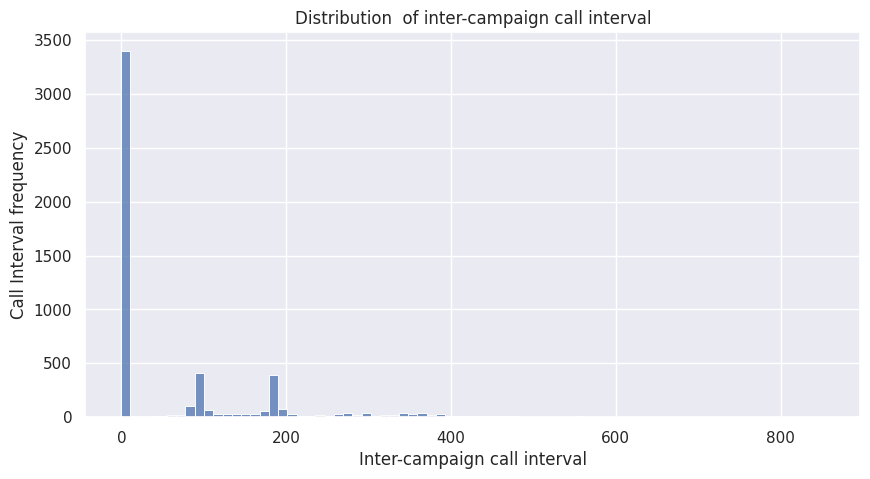

In [ ]:
# Distribution  of inter-campaign call interval
plt.figure(figsize=(10, 5))

sns.histplot(x='pdays', data=success)

plt.title('Distribution  of inter-campaign call interval')
plt.xlabel('Inter-campaign call interval')
plt.ylabel('Call Interval frequency')
plt.show();
plt.close("all")

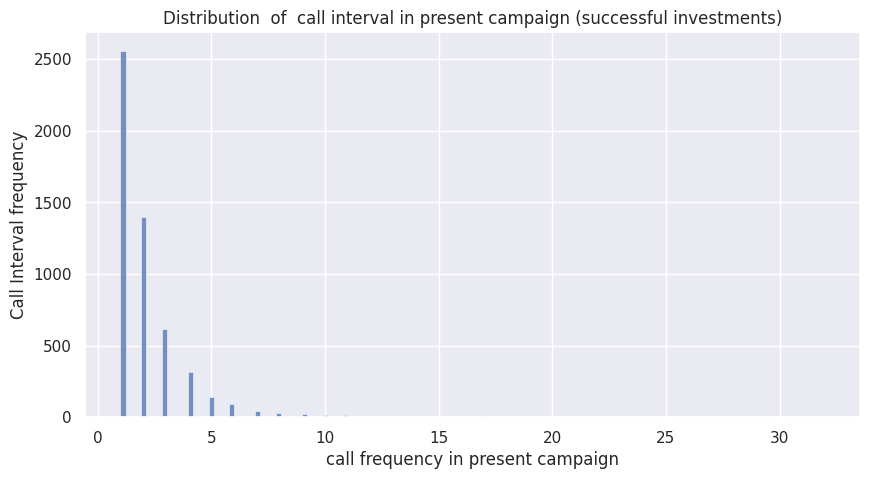

In [ ]:
# call interval in present campaign
plt.figure(figsize=(10, 5))

sns.histplot(x='campaign', data=success)

plt.title('Distribution  of  call interval in present campaign (successful investments)')
plt.xlabel('call frequency in present campaign')
plt.ylabel('Call Interval frequency')
plt.show();
plt.close("all")

In [ ]:
# Extract successful deposit subset from  previous campaign
previous_success = data.loc[data['poutcome'] == 'success']

In [ ]:
previous_success

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
899,56,technician,married,secondary,no,589,yes,no,unknown,23,oct,518,1,147,2,success,yes
951,53,retired,married,tertiary,no,2269,no,no,cellular,17,nov,1091,2,150,1,success,yes
985,46,unemployed,divorced,secondary,no,3354,yes,no,cellular,19,nov,522,1,174,1,success,yes
994,40,management,married,tertiary,no,3352,yes,no,cellular,19,nov,639,2,27,1,success,yes
1151,31,management,married,tertiary,no,1331,no,no,cellular,3,feb,182,2,90,1,success,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10798,67,technician,married,secondary,no,0,no,no,cellular,13,aug,1152,2,188,1,success,no
10911,33,technician,married,secondary,no,348,yes,no,cellular,7,may,263,2,294,1,success,no
10918,36,entrepreneur,single,tertiary,no,145,yes,no,cellular,18,may,450,2,304,2,success,no
11069,33,self-employed,single,tertiary,no,658,yes,no,cellular,12,apr,93,1,173,2,success,no


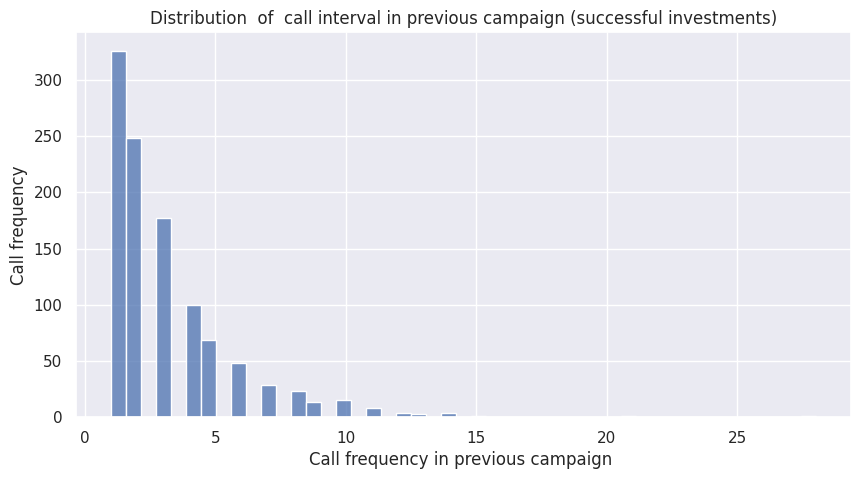

In [ ]:
# Distribution  of call frequencies  in previous campaign

# call interval in present campaign
plt.figure(figsize=(10, 5))

sns.histplot(x='previous', data=previous_success)

plt.title('Distribution  of  call interval in previous campaign (successful investments)')
plt.xlabel('Call frequency in previous campaign ')
plt.ylabel('Call frequency')
plt.show();
plt.close("all")

##Inter-campaign call  intervall with respect  to previous deposit outcome

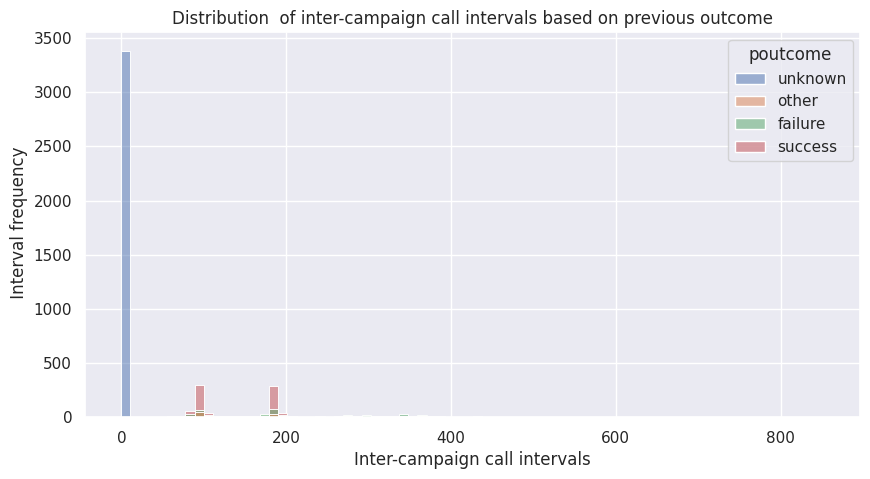

In [ ]:
# Visualization of inter-campaign call intervals based on previous outcome

plt.figure(figsize=(10, 5))

sns.histplot(x='pdays', hue='poutcome', data=success)

plt.title('Distribution  of inter-campaign call intervals based on previous outcome')
plt.xlabel('Inter-campaign call intervals')
plt.ylabel(' Interval frequency')
plt.show();
plt.close("all")

##Customer deposit decision and call duration

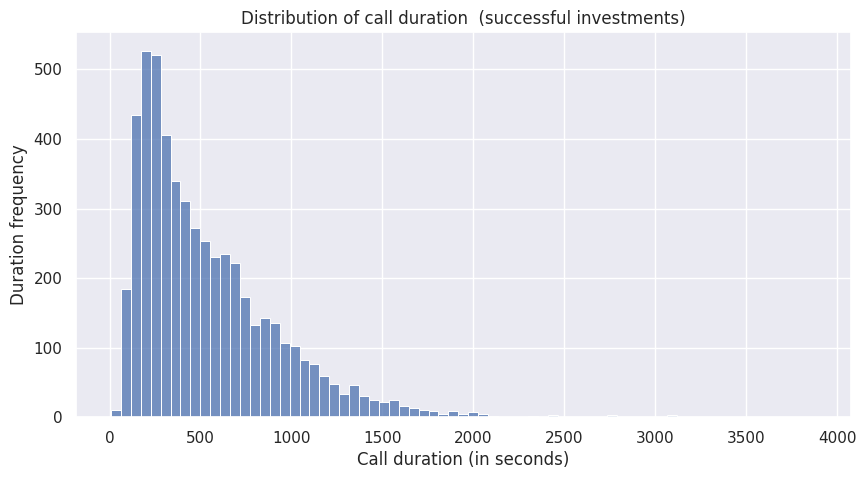

In [ ]:
# Distribution of call duration for successful deposits

plt.figure(figsize=(10, 5))

sns.histplot(x='duration', data=success)

plt.title('Distribution of call duration  (successful investments)')
plt.xlabel('Call duration (in seconds)')
plt.ylabel('Duration frequency')
plt.show();
plt.close("all")

##Label Imbalance

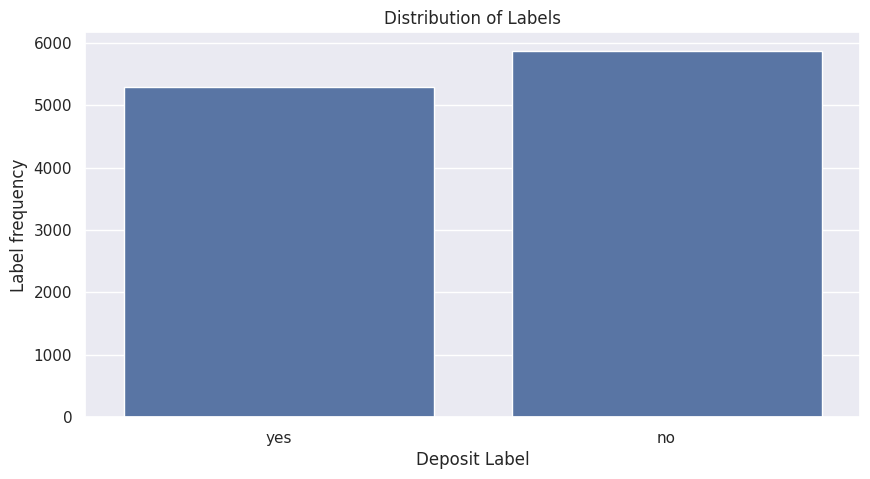

In [ ]:
# Distribution of Labels

plt.figure(figsize=(10, 5))

sns.countplot(x='deposit', data=data)

plt.title('Distribution of Labels')
plt.xlabel('Deposit Label')
plt.ylabel('Label frequency')
plt.show();

In [ ]:
# feature  correlation
correlation = data.select_dtypes(exclude=['object']).corr(method="pearson")

In [ ]:
correlation

,age,balance,day,duration,campaign,pdays,previous
age,1.000000,0.112300,-0.000762,0.000189,-0.005278,0.002774,0.020169
balance,0.112300,1.000000,0.010467,0.022436,-0.013894,0.017411,0.030805
day,-0.000762,0.010467,1.000000,-0.018511,0.137007,-0.077232,-0.058981
duration,0.000189,0.022436,-0.018511,1.000000,-0.041557,-0.027392,-0.026716
campaign,-0.005278,-0.013894,0.137007,-0.041557,1.000000,-0.102726,-0.049699
pdays,0.002774,0.017411,-0.077232,-0.027392,-0.102726,1.000000,0.507272
previous,0.020169,0.030805,-0.058981,-0.026716,-0.049699,0.507272,1.000000


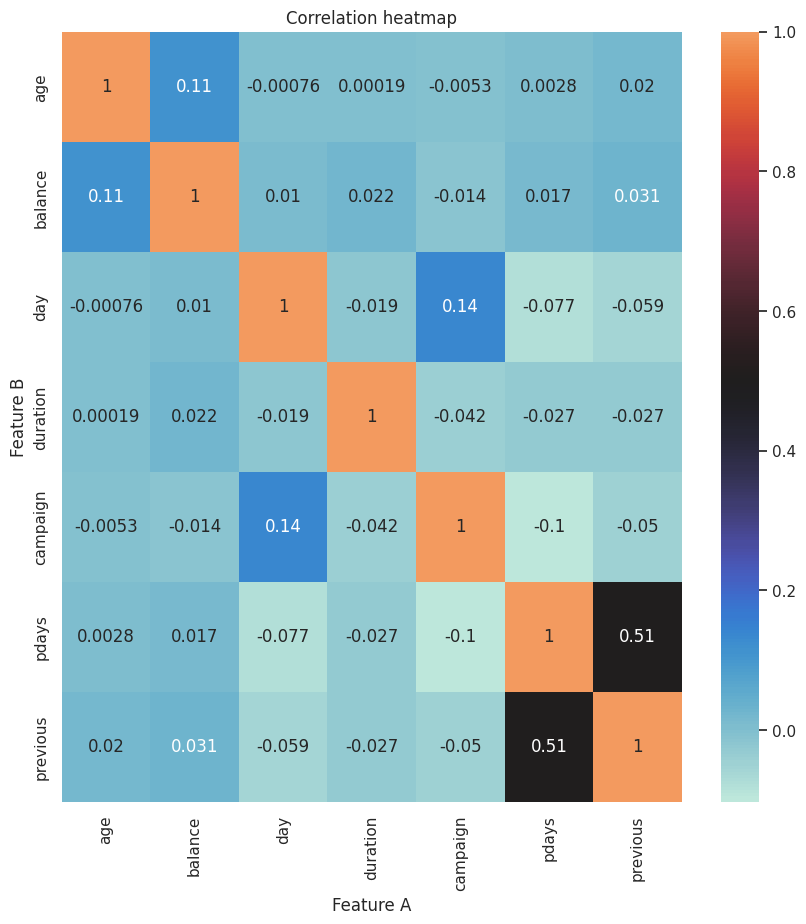

In [ ]:
# correlation heatmap
plt.figure(figsize=(10, 10))

sns.heatmap(correlation, annot=True, center= .5)

plt.title('Correlation heatmap')
plt.xlabel('Feature A')
plt.ylabel('Feature B')
plt.xticks(rotation=90)
plt.show();
plt.close("all")

In [ ]:
# correlation of target variable with independant variables

target = data['deposit'].apply(lambda x: 1 if x == 'yes' else 0)

data.select_dtypes(exclude=['object']).corrwith(target, method="spearman")

age        -0.012156
balance     0.157584
day        -0.058325
duration    0.527801
campaign   -0.126666
pdays       0.212805
previous    0.229905
dtype: float64

**<h2>2.2 .  Data Implications </h2>**

Implied by our fundings above, we can say the following :    



1.   **Missing Values** : There are no missing values in the  dataset

2.   **Data duplication** : There are no duplicated values in the dataset



3.   **Correlation** For the most part, there are some instances of multilcollinearity. The features exhibit very little correlation with  one another , hence ensuring  feature independence. However, the target variable exhibits  a low correlation  with  the independent  variables.


4.   **Categorical features**: There are  a number of  categorical features inthe dataset (**job, marital, education, default, housing, loan,  contact, poutcome, and deposit** .These will need to be encoded  in some way.





**<h2>2.2 .  Data Preparation </h2>**


Based on the **Data Implications** discovered prior, the following steps will be experimented upon for the data preparing stage.






1.   **Split Data**: Split the data into train and test sets

2.   **Feature Encoding**: Encode categorical features

3.   **Feature scaling**:Some features display  large magnitudes/range(eg: **balance, duration**). These will need  to be scaled



In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
data.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
deposit      object
dtype: object

In [ ]:
categorical_features = data.select_dtypes(include=['object']).columns.tolist()

scale_features = [
    'age',
    'balance',
    'day',
    'duration',

]

categorical_features.remove('deposit')

In [ ]:
from re import X
# Get features  and target

X = data.drop('deposit', axis=1)
y = data['deposit']

In [ ]:
# Encode target
map_dictionary = {'yes': 1, 'no': 0}
y = y.apply(lambda x: map_dictionary[x])

In [ ]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: deposit, dtype: int64

In [ ]:
# Get train and test splits

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y)

**<h1> Data Modeling </h1>**

Three modeling  options  will be explored

1.  Logistic Regression

2.  ExtraTrees

3.  CatBoost models

In [ ]:
!pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.2/98.2 MB 2.4 MB/s eta 0:00:00


In [ ]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import ExtraTreesClassifier
from catboost import CatBoostClassifier

In [ ]:


def get_transformer(categorical_features, scale_features, one_hot = False):
  if one_hot:
    encoder = ColumnTransformer(
        transformers=[
            ('onehot', OneHotEncoder(), categorical_features),
            ('scale', StandardScaler(), scale_features) ],

        remainder='passthrough'

    )

  else:
    encoder = ColumnTransformer(
        transformers=[
            ('ordinal', OrdinalEncoder(), categorical_features),
            ('scale', StandardScaler(), scale_features) ],

        remainder='passthrough'

    )

  return encoder

In [ ]:
# Instantiate the model
log_pipe = Pipeline(
    steps=[
        ("1", get_transformer(categorical_features, scale_features, one_hot=True)),
        ('2', LogisticRegression(max_iter=1000))
    ]
)


cat_pipe = Pipeline(
    steps=[
        ("1", get_transformer(categorical_features, scale_features, one_hot=False)),
        ('2', CatBoostClassifier())
    ]
)


extra_pipe = Pipeline(
    steps=[
        ("1", get_transformer(categorical_features, scale_features, one_hot=False)),
        ('2', ExtraTreesClassifier())
    ]
)


In [ ]:
# Fit logitic Regressor Model
log_pipe.fit(X_train, y_train)

Pipeline(steps=[('1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehot', OneHotEncoder(),
                                                  ['job', 'marital',
                                                   'education', 'default',
                                                   'housing', 'loan', 'contact',
                                                   'month', 'poutcome']),
                                                 ('scale', StandardScaler(),
                                                  ['age', 'balance', 'day',
                                                   'duration'])])),
                ('2', LogisticRegression(max_iter=1000))])

In [ ]:
# Fit CatBoost Model
cat_pipe.fit(X_train, y_train)

Learning rate set to 0.024784
0:	learn: 0.6792614	total: 57.6ms	remaining: 57.6s
1:	learn: 0.6670297	total: 67.7ms	remaining: 33.8s
2:	learn: 0.6552237	total: 76.1ms	remaining: 25.3s
3:	learn: 0.6424570	total: 85.7ms	remaining: 21.3s
4:	learn: 0.6303547	total: 96.6ms	remaining: 19.2s
5:	learn: 0.6188339	total: 106ms	remaining: 17.6s
6:	learn: 0.6091280	total: 118ms	remaining: 16.8s
7:	learn: 0.5996932	total: 125ms	remaining: 15.5s
8:	learn: 0.5909439	total: 138ms	remaining: 15.2s
9:	learn: 0.5832708	total: 146ms	remaining: 14.4s
10:	learn: 0.5749255	total: 156ms	remaining: 14.1s
11:	learn: 0.5660091	total: 166ms	remaining: 13.7s
12:	learn: 0.5594661	total: 172ms	remaining: 13s
13:	learn: 0.5527597	total: 179ms	remaining: 12.6s
14:	learn: 0.5464732	total: 196ms	remaining: 12.9s
15:	learn: 0.5407875	total: 204ms	remaining: 12.6s
16:	learn: 0.5348484	total: 217ms	remaining: 12.6s
17:	learn: 0.5292410	total: 226ms	remaining: 12.3s
18:	learn: 0.5232796	total: 236ms	remaining: 12.2s
19:	lear

Pipeline(steps=[('1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinal', OrdinalEncoder(),
                                                  ['job', 'marital',
                                                   'education', 'default',
                                                   'housing', 'loan', 'contact',
                                                   'month', 'poutcome']),
                                                 ('scale', StandardScaler(),
                                                  ['age', 'balance', 'day',
                                                   'duration'])])),
                ('2',
                 <catboost.core.CatBoostClassifier object at 0x78abac7d9930>)])

In [ ]:
#Fit ExtaTree Model
extra_pipe.fit(X_train, y_train)

Pipeline(steps=[('1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinal', OrdinalEncoder(),
                                                  ['job', 'marital',
                                                   'education', 'default',
                                                   'housing', 'loan', 'contact',
                                                   'month', 'poutcome']),
                                                 ('scale', StandardScaler(),
                                                  ['age', 'balance', 'day',
                                                   'duration'])])),
                ('2', ExtraTreesClassifier())])

**5.  Model Evaluation**

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

In [ ]:
def test_model(model, data):
  train , test = data
  X_train, y_train = train
  X_test, y_test = test


  train_core = classification_report(y_train, model.predict(X_train))
  test_core = classification_report(y_test, model.predict(X_test))

  print("="*30, "Train Report", "="*30, "\n")
  print(train_core)

  print("="*30, "Test Report", "="*30, "\n")
  print(test_core)



  return

In [ ]:
# Accumulate  data for testing
df = [
    (X_train, y_train),
    (X_test, y_test)
]

In [ ]:
# Test Logistic Model
test_model(log_pipe, df)

============================== Train Report ============================== 

              precision    recall  f1-score   support

           0       0.82      0.85      0.84      4111
           1       0.83      0.79      0.81      3702

    accuracy                           0.83      7813
   macro avg       0.83      0.82      0.82      7813
weighted avg       0.83      0.83      0.82      7813

============================== Test Report ============================== 

              precision    recall  f1-score   support

           0       0.83      0.85      0.84      1762
           1       0.83      0.80      0.82      1587

    accuracy                           0.83      3349
   macro avg       0.83      0.83      0.83      3349
weighted avg       0.83      0.83      0.83      3349



In [ ]:
# Test CatBoost Model
test_model(cat_pipe, df)

============================== Train Report ============================== 

              precision    recall  f1-score   support

           0       0.93      0.89      0.91      4111
           1       0.89      0.93      0.91      3702

    accuracy                           0.91      7813
   macro avg       0.91      0.91      0.91      7813
weighted avg       0.91      0.91      0.91      7813

============================== Test Report ============================== 

              precision    recall  f1-score   support

           0       0.89      0.84      0.87      1762
           1       0.84      0.88      0.86      1587

    accuracy                           0.86      3349
   macro avg       0.86      0.86      0.86      3349
weighted avg       0.86      0.86      0.86      3349



In [ ]:
# Test ExtraTree Model
test_model(extra_pipe, df)

============================== Train Report ============================== 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4111
           1       1.00      1.00      1.00      3702

    accuracy                           1.00      7813
   macro avg       1.00      1.00      1.00      7813
weighted avg       1.00      1.00      1.00      7813

============================== Test Report ============================== 

              precision    recall  f1-score   support

           0       0.85      0.83      0.84      1762
           1       0.82      0.84      0.83      1587

    accuracy                           0.84      3349
   macro avg       0.84      0.84      0.84      3349
weighted avg       0.84      0.84      0.84      3349



**Hyperparametric Optimization**

In [ ]:
from sklearn.model_selection import GridSearchCV,  RepeatedKFold

In [ ]:
# Reinstantiate model

new_log_pipe = Pipeline(
    steps=[
        ("1", get_transformer(categorical_features, scale_features, one_hot=True)),
        ('2', LogisticRegression(max_iter=1000))
    ]
)


new_cat_pipe = Pipeline(
    steps=[
        ("1", get_transformer(categorical_features, scale_features, one_hot=False)),
        ('2', CatBoostClassifier())
    ]
)

In [ ]:
# Instantiate hyperparametric grid

cat_grid_params = {
    "2__sampling_frequency" : ["PerTree", "PerTreeLevel"],
    "2__l2_leaf_reg" : [.0, .1, .2, .3, .4, .5]
}

log_grid_params = {
    "2__penalty" : ["l1", "l2", "elasticnet", None],
    "2__C" : [1., 2., 3., 4.]
}



In [ ]:
# Instantiate grid object
log_grid = GridSearchCV(
    estimator = new_log_pipe,
    param_grid = log_grid_params,
    scoring = "accuracy",
    cv = RepeatedKFold(n_splits= 2, n_repeats=3)

)


cat_grid = GridSearchCV(
    estimator = new_cat_pipe,
    param_grid = cat_grid_params,
    scoring = "accuracy",
    cv = RepeatedKFold(n_splits= 2, n_repeats=3)

)



In [ ]:

log_grid.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and

GridSearchCV(cv=RepeatedKFold(n_repeats=3, n_splits=2, random_state=None),
             estimator=Pipeline(steps=[('1',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('onehot',
                                                                         OneHotEncoder(),
                                                                         ['job',
                                                                          'marital',
                                                                          'education',
                                                                          'default',
                                                                          'housing',
                                                                          'loan',
                                                                          'contact',
                                                                          'month',
                                                                          'poutcome']),
                                                                        ('scale',
                                                                         StandardScaler(),
                                                                         ['age',
                                                                          'balance',
                                                                          'day',
                                                                          'duration'])])),
                                       ('2',
                                        LogisticRegression(max_iter=1000))]),
             param_grid={'2__C': [1.0, 2.0, 3.0, 4.0],
                         '2__penalty': ['l1', 'l2', 'elasticnet', None]},
             scoring='accuracy')

In [122]:
cat_grid.fit(X_train, y_train)

Streaming output truncated to the last 5000 lines.
0:	learn: 0.6777315	total: 4.59ms	remaining: 4.59s
1:	learn: 0.6627555	total: 8.83ms	remaining: 4.4s
2:	learn: 0.6495978	total: 12.9ms	remaining: 4.3s
3:	learn: 0.6365589	total: 16.8ms	remaining: 4.18s
4:	learn: 0.6235199	total: 20.7ms	remaining: 4.12s
5:	learn: 0.6114117	total: 24.3ms	remaining: 4.03s
6:	learn: 0.6005247	total: 28.5ms	remaining: 4.05s
7:	learn: 0.5884800	total: 32.5ms	remaining: 4.03s
8:	learn: 0.5779141	total: 36.7ms	remaining: 4.04s
9:	learn: 0.5675520	total: 40.7ms	remaining: 4.03s
10:	learn: 0.5599140	total: 44.7ms	remaining: 4.01s
11:	learn: 0.5525991	total: 48.5ms	remaining: 3.99s
12:	learn: 0.5447394	total: 52.4ms	remaining: 3.98s
13:	learn: 0.5381630	total: 56.3ms	remaining: 3.97s
14:	learn: 0.5313496	total: 60.2ms	remaining: 3.95s
15:	learn: 0.5247292	total: 64.1ms	remaining: 3.94s
16:	learn: 0.5183240	total: 68.1ms	remaining: 3.94s
17:	learn: 0.5122047	total: 72.1ms	remaining: 3.93s
18:	learn: 0.5072123	tota

GridSearchCV(cv=RepeatedKFold(n_repeats=3, n_splits=2, random_state=None),
             estimator=Pipeline(steps=[('1',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('ordinal',
                                                                         OrdinalEncoder(),
                                                                         ['job',
                                                                          'marital',
                                                                          'education',
                                                                          'default',
                                                                          'housing',
                                                                          'loan',
                                                                          'contact',
                                                                          'month',
                                                                          'poutcome']),
                                                                        ('scale',
                                                                         StandardScaler(),
                                                                         ['age',
                                                                          'balance',
                                                                          'day',
                                                                          'duration'])])),
                                       ('2',
                                        <catboost.core.CatBoostClassifier object at 0x78abac810e20>)]),
             param_grid={'2__l2_leaf_reg': [0.0, 0.1, 0.2, 0.3, 0.4, 0.5],
                         '2__sampling_frequency': ['PerTree', 'PerTreeLevel']},
             scoring='accuracy')

In [123]:
# Test the best CatBoost model
test_model(cat_grid.best_estimator_, df)

============================== Train Report ============================== 

              precision    recall  f1-score   support

           0       0.95      0.93      0.94      4111
           1       0.92      0.95      0.93      3702

    accuracy                           0.94      7813
   macro avg       0.94      0.94      0.94      7813
weighted avg       0.94      0.94      0.94      7813

============================== Test Report ============================== 

              precision    recall  f1-score   support

           0       0.89      0.85      0.87      1762
           1       0.84      0.88      0.86      1587

    accuracy                           0.86      3349
   macro avg       0.86      0.86      0.86      3349
weighted avg       0.86      0.86      0.86      3349



In [124]:
# Test the best lR model
test_model(log_grid.best_estimator_, df)

============================== Train Report ============================== 

              precision    recall  f1-score   support

           0       0.82      0.85      0.84      4111
           1       0.83      0.79      0.81      3702

    accuracy                           0.83      7813
   macro avg       0.83      0.82      0.82      7813
weighted avg       0.83      0.83      0.82      7813

============================== Test Report ============================== 

              precision    recall  f1-score   support

           0       0.83      0.85      0.84      1762
           1       0.83      0.80      0.82      1587

    accuracy                           0.83      3349
   macro avg       0.83      0.83      0.83      3349
weighted avg       0.83      0.83      0.83      3349



## Final Recommendations

We have a number of recommendations for **EliteBank**.  These recommendations are based on  our:
 .   Exploratory  Data Analysis and

 .   Data Modeling

## Recommendations based on EDA


1.  EliteBank should explore avenues to ensure the telemarketing calls  are not too long.  Ideally, they should  be aroud  the 250 second (or ~4 minute) mark. This should give  enought time to build rapport with the client, and disemminate  necessary information , not dragging on too long.

2.  Based on EDA, it's advisable that EliteBank seek to contact their customers as soon as possible, preferably as soon a new telemarking  compaign starts.

3.  From the data, it is obvious that hoiusing  loans are quite expensive and difficult to pay . EliteBank would win a loyal segment  of customers if they would come up with avenues to:

    -   Subdivize housing loans

    -   Buy smart investments  that can pay off the mortgage  and / or

    -   Provide better systems  and strategies for customers to pay back  their housing loans

4.  EliteBank can focus on tailoring investment  opportunities  for retired people, as thes people seem more likely to make investments compared to young working class people

##Recommendation based Data Modeling and Data Optimization


Based on our final observations from the optimization process, we have not been able to  improve the models. this may be due to :    

  1.   Insuffisant data

  2.  Focusing on small / wrong range of hyperparameters


  3.  Focusing on the wrong hyperparameters


Further  optimization  of models  might result on better model.  This can be explored further.  At this point ,  either model performs quite adequately . The final choice would be the Logistic model, due to:

1.  Lower generalization  error,

2.  Faster training, and

3. More explanability